In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import unique
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
df = pd.read_csv ('mall_customers_dataset.csv', sep=';')

In [47]:
columns_df = df.iloc[0]
df.columns =columns_df
df = df.iloc[1:,:]
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100)
1,1,Male,19,15000,39
2,2,Male,21,15000,81
3,3,Female,20,16000,6
4,4,Female,23,16000,77
5,5,Female,31,17000,40
...,...,...,...,...,...
196,196,Female,35,120000,79
197,197,Female,45,126000,28
198,198,Male,32,126000,74
199,199,Male,32,137000,18


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 1 to 200
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    object
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    object
 3   Annual Income ($)       200 non-null    object
 4   Spending Score (1-100)  200 non-null    object
dtypes: object(5)
memory usage: 7.9+ KB


In [49]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Annual Income ($)'] = pd.to_numeric(df['Annual Income ($)'], errors='coerce')
df['Spending Score (1-100)'] = pd.to_numeric(df['Spending Score (1-100)'], errors='coerce')
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 1 to 200
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    object
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income ($)       200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 7.9+ KB


In [50]:
df.describe()

,Age,Annual Income ($),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60560.000000,50.200000
std,13.969007,26264.721165,25.823522
min,18.000000,15000.000000,1.000000
25%,28.750000,41500.000000,34.750000
50%,36.000000,61500.000000,50.000000
75%,49.000000,78000.000000,73.000000
max,70.000000,137000.000000,99.000000


In [51]:
df.isnull().sum()

0
CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
dtype: int64

In [52]:
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture


In [53]:
fig = px.box(df,y = 'Annual Income ($)')

# Update yaxis properties
fig.update_yaxes(title_text='Annual Income', row=1, col=1)


# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Annual Income</b>',
)


In [54]:
scatterplt = px.scatter(df,x='Annual Income ($)',y='Spending Score (1-100)')
scatterplt.update_xaxes(title='Annual Income ($)')
scatterplt.update_yaxes(title='Spending Score (1-100)')
scatterplt.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Annual Income ($), Spending Score (1-100)</b>')
scatterplt.show()

In [55]:
df.drop(['Gender'], axis=1, inplace=True)
df.drop(['CustomerID'], axis=1, inplace=True)
df.drop(['Age'], axis=1, inplace=True)

<a id = "4"></a><br>
## 1 - K-Means

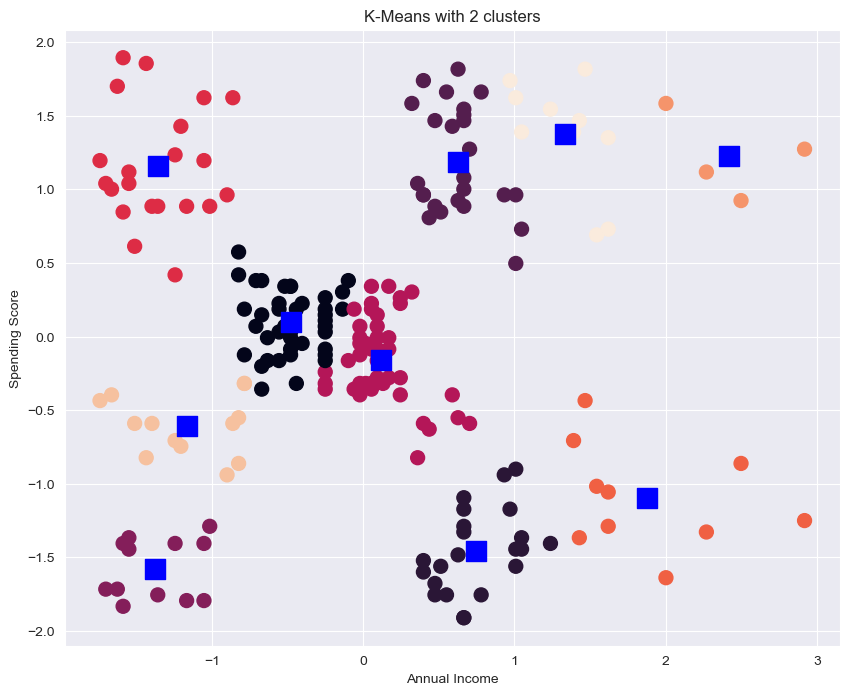

In [56]:
k_means = KMeans(n_clusters=10)
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)
k_means.fit_predict(scaled_features)

centers = k_means.cluster_centers_

plt.figure(figsize=(10, 8))

plt.scatter(scaled_features[:,0],
            scaled_features[:,1],
            c=k_means.labels_, s=100)

plt.scatter(centers[:,0], centers[:,1], color='blue', marker='s', s=200)

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-Means with 2 clusters')

plt.show()

Silhouette Score for KMeans

In [57]:
from sklearn.metrics import silhouette_score

score = silhouette_score (scaled_features, k_means.labels_)
print("Score = ", score)

Score =  0.43985077281432433


Elbow Plot

Text(0.5, 1.0, 'Elbow plot for optimal number of clusters')

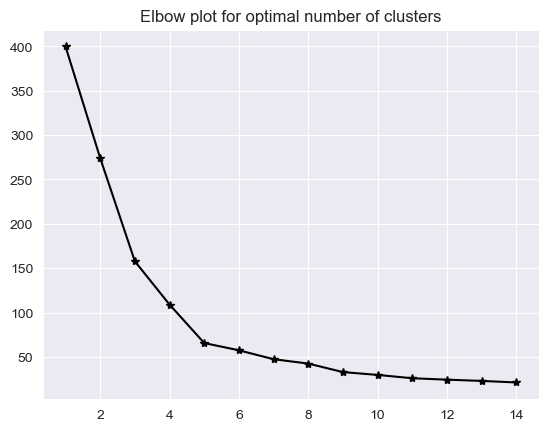

In [58]:
wscc = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i, init="k-means++",random_state=0)
    kmeans.fit(scaled_features[:,[0,1]])
    wscc.append(kmeans.inertia_)

plt.plot(range(1,15),wscc,marker="*",c="black")
plt.title("Elbow plot for optimal number of clusters")

### KMeans clustering with 5 clusters


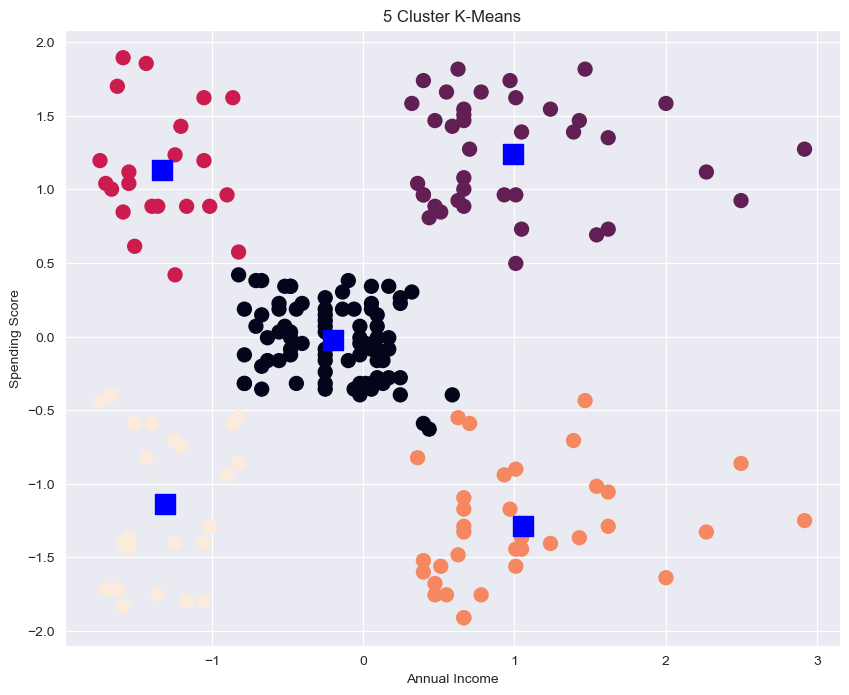

In [59]:
k_means = KMeans(n_clusters=5)
k_means.fit_predict(scaled_features[:,[0,1]])
centers = k_means.cluster_centers_
centers
plt.figure(figsize=(10, 8))

plt.scatter(scaled_features[:,0],
            scaled_features[:,1],
            c=k_means.labels_, s=100)

plt.scatter(centers[:,0], centers[:,1], color='blue', marker='s', s=200)

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('5 Cluster K-Means')

plt.show()

Hierarchical Clustering

Hierarchical Clustering Silhouette Score: 0.5538089226688662


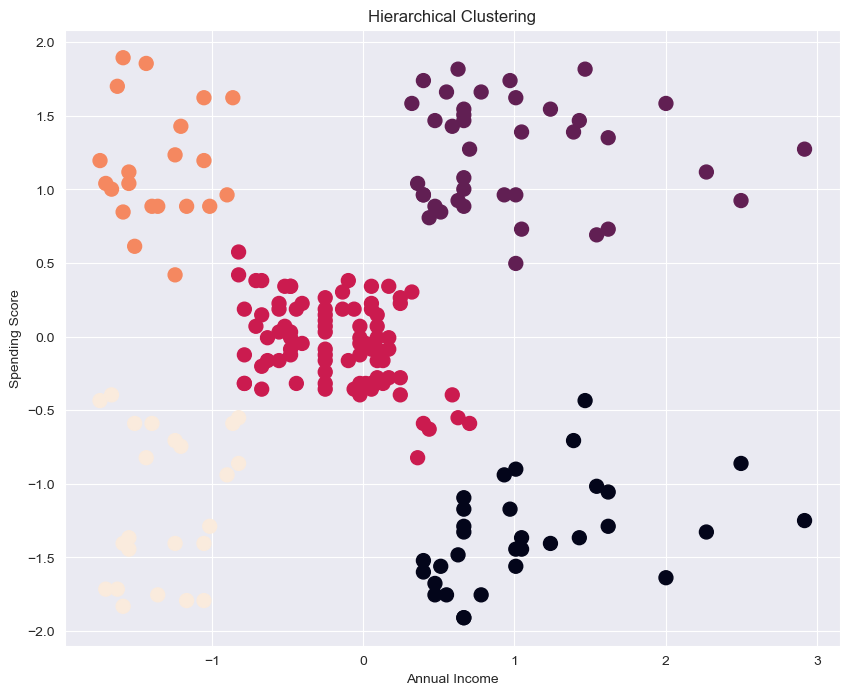

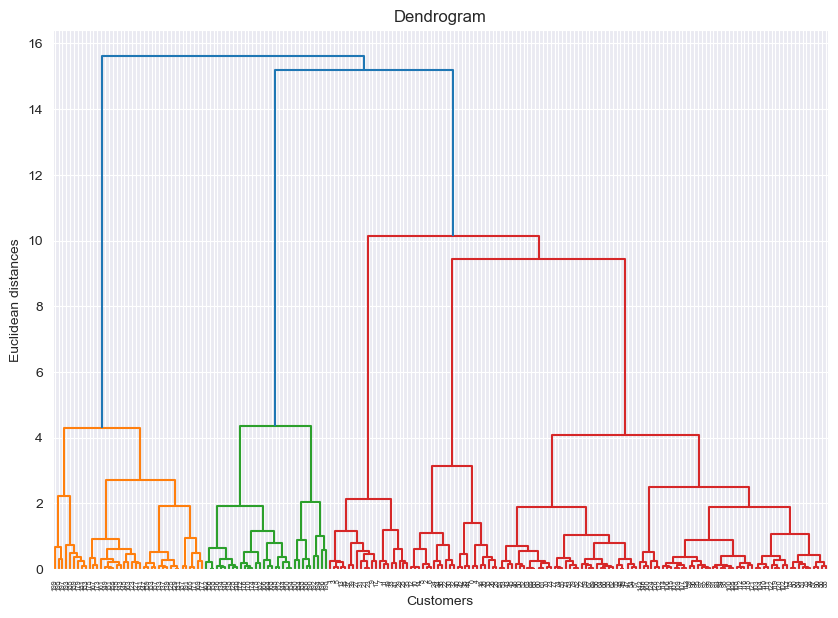

Hierarchical Clustering Silhouette Score: 0.5538089226688662


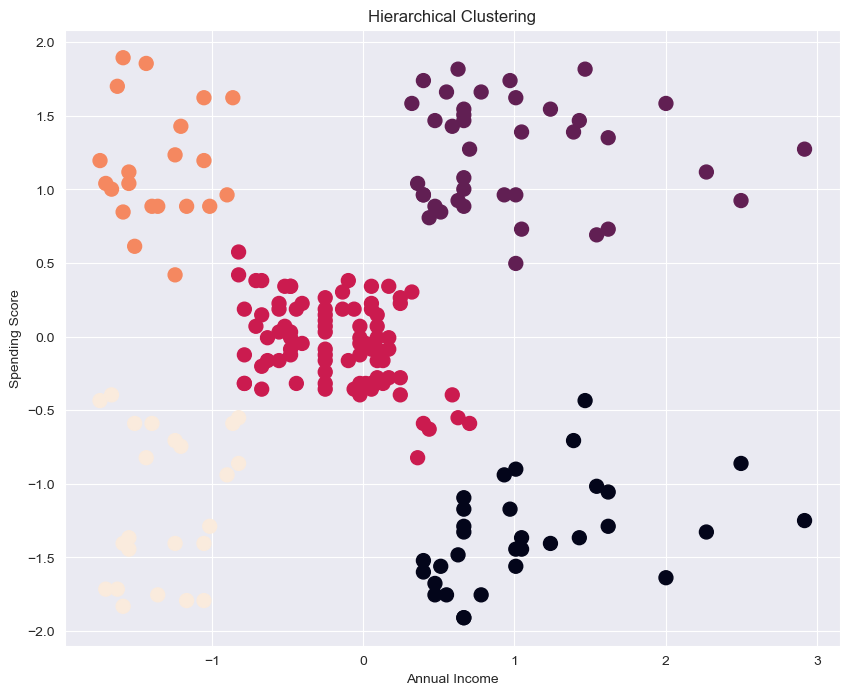

In [60]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

# Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
y_hc = hc.fit_predict(scaled_features)

# Silhouette Score
hc_silhouette_score = silhouette_score(scaled_features, y_hc)
print("Hierarchical Clustering Silhouette Score:", hc_silhouette_score)

# Plotting clusters
plt.figure(figsize=(10, 8))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=y_hc, s=100)
plt.title('Hierarchical Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

# Elbow method for Hierarchical Clustering
def plot_dendrogram(scaled_features):
    plt.figure(figsize=(10, 7))
    dendrogram = sch.dendrogram(sch.linkage(scaled_features, method='ward'))
    plt.title('Dendrogram')
    plt.xlabel('Customers')
    plt.ylabel('Euclidean distances')
    plt.show()

plot_dendrogram(scaled_features)

# Applying Hierarchical Clustering with optimal k
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
y_hc = hc.fit_predict(scaled_features)

# Silhouette Score
hc_silhouette_score = silhouette_score(scaled_features, y_hc)
print("Hierarchical Clustering Silhouette Score:", hc_silhouette_score)

# Plotting clusters
plt.figure(figsize=(10, 8))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=y_hc, s=100)
plt.title('Hierarchical Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

DBSCAN

DBSCAN Silhouette Score: 0.35044619989666004


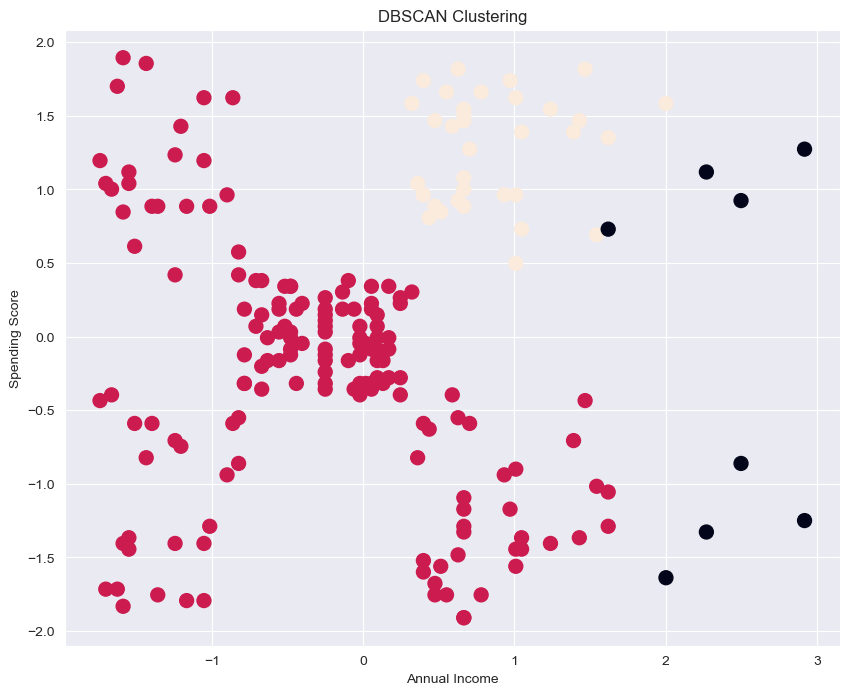

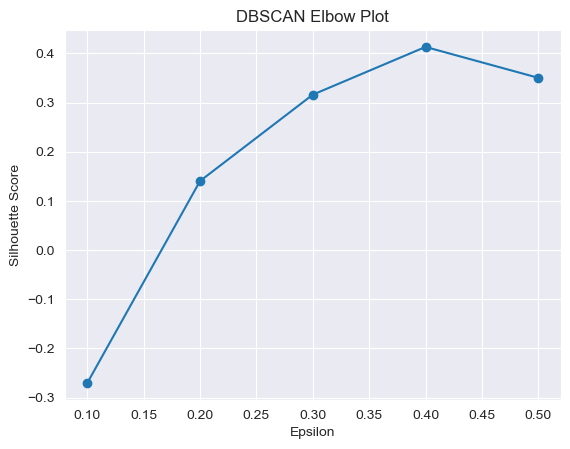

DBSCAN Silhouette Score after optimal epsilon: 0.41325830390002166


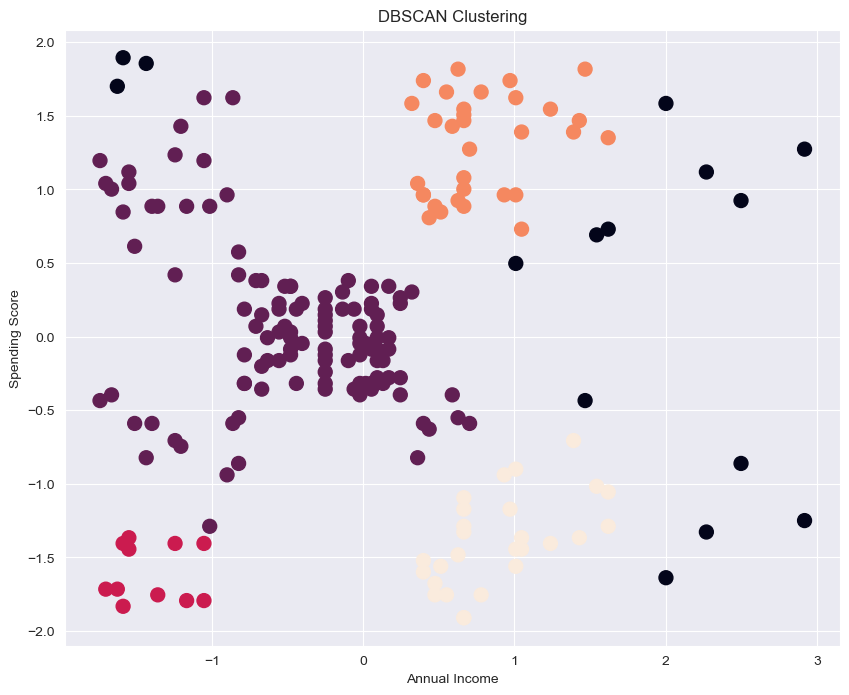

In [61]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(scaled_features)

# Silhouette Score
dbscan_silhouette_score = silhouette_score(scaled_features, y_dbscan)
print("DBSCAN Silhouette Score:", dbscan_silhouette_score)

# Plotting clusters
plt.figure(figsize=(10, 8))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=y_dbscan, s=100)
plt.title('DBSCAN Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()



# Elbow method is not applicable for DBSCAN, so we use a range of eps values
def plot_dbscan_elbow(data):
    eps_values = [0.1, 0.2, 0.3, 0.4, 0.5]
    silhouette_scores = []
    for eps in eps_values:
        dbscan = DBSCAN(eps=eps, min_samples=5)
        labels = dbscan.fit_predict(data)
        if len(set(labels)) > 1:
            score = silhouette_score(data, labels)
            silhouette_scores.append(score)
        else:
            silhouette_scores.append(-1)
    plt.plot(eps_values, silhouette_scores, marker='o')
    plt.title('DBSCAN Elbow Plot')
    plt.xlabel('Epsilon')
    plt.ylabel('Silhouette Score')
    plt.show()

plot_dbscan_elbow(scaled_features)

# Applying DBSCAN with optimal eps
dbscan = DBSCAN(eps=0.40, min_samples=5)
y_dbscan = dbscan.fit_predict(scaled_features)

# Silhouette Score
dbscan_silhouette_score = silhouette_score(scaled_features, y_dbscan)
print("DBSCAN Silhouette Score after optimal epsilon:", dbscan_silhouette_score)

# Plotting clusters
plt.figure(figsize=(10, 8))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=y_dbscan, s=100)
plt.title('DBSCAN Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

BIRCH

BIRCH Silhouette Score: 0.4773820802546034


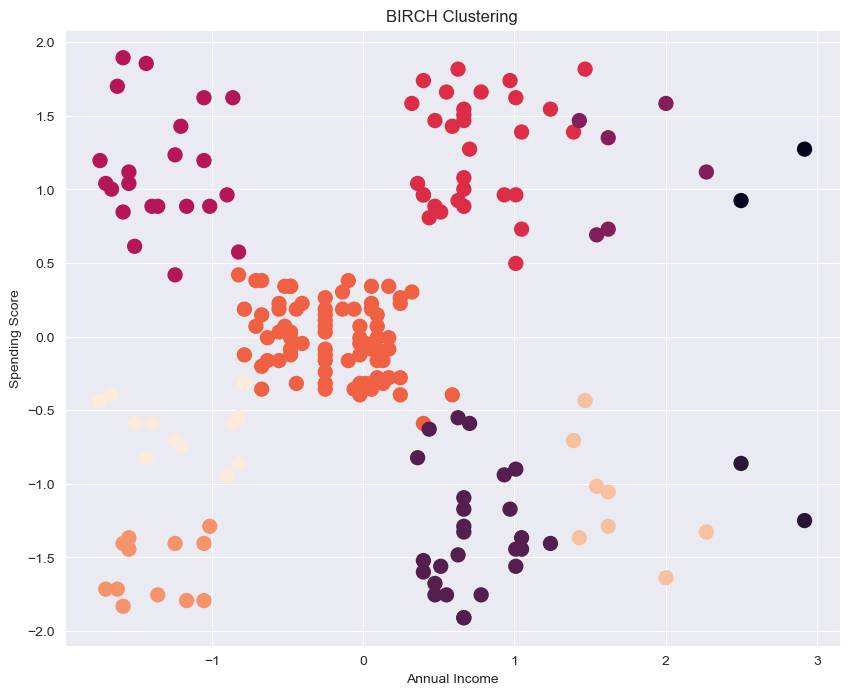

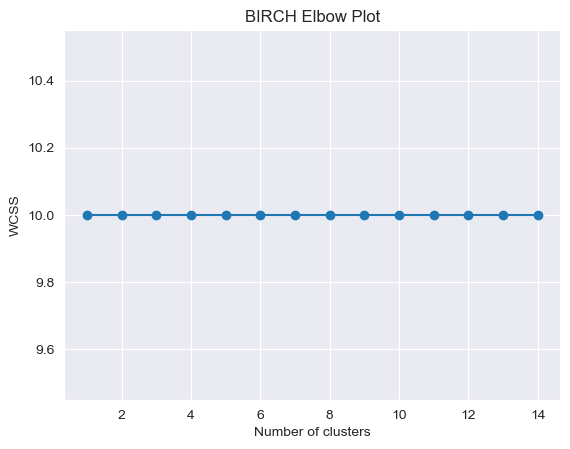

BIRCH Silhouette Score: 0.41445036622016135


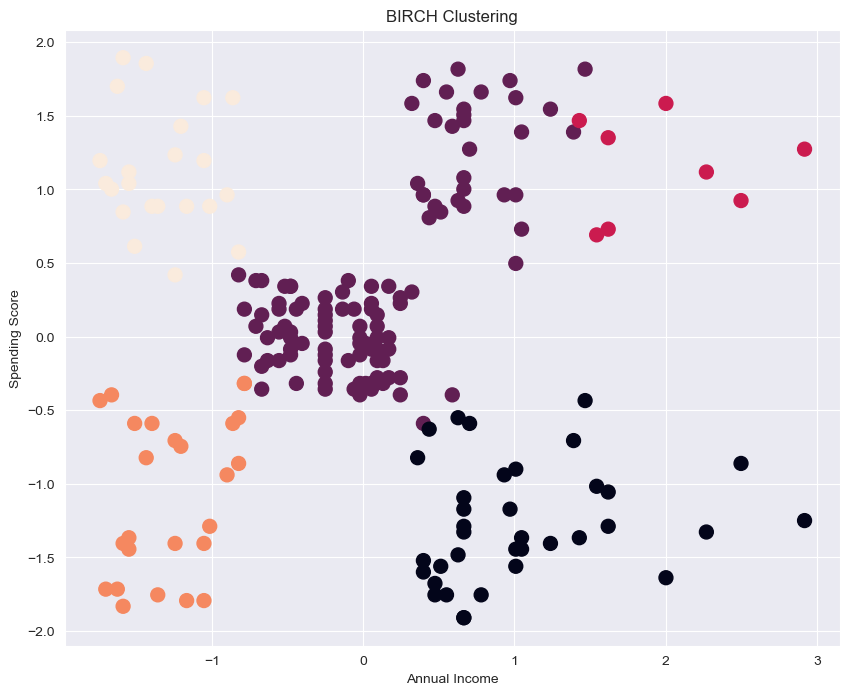

In [62]:
from sklearn.cluster import Birch
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score

# BIRCH
birch = Birch(n_clusters=10)
y_birch = birch.fit_predict(scaled_features)

# Silhouette Score
birch_silhouette_score = silhouette_score(scaled_features, y_birch)
print("BIRCH Silhouette Score:", birch_silhouette_score)

# Plotting clusters
plt.figure(figsize=(10, 8))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=y_birch, s=100)
plt.title('BIRCH Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

# Elbow method for BIRCH
def plot_birch_elbow(data):
    wcss = []
    for i in range(1, 15):
        birch = Birch(n_clusters=i)
        birch.fit(data)
        wcss.append(birch.subcluster_centers_.shape[0])
    plt.plot(range(1, 15), wcss, marker='o')
    plt.title('BIRCH Elbow Plot')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

plot_birch_elbow(scaled_features)

# Applying BIRCH with optimal k
birch = Birch(n_clusters=5)
y_birch = birch.fit_predict(scaled_features)

# Silhouette Score
birch_silhouette_score = silhouette_score(scaled_features, y_birch)
print("BIRCH Silhouette Score:", birch_silhouette_score)

# Plotting clusters
plt.figure(figsize=(10, 8))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=y_birch, s=100)
plt.title('BIRCH Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

the strengths and weaknesses of each clustering algorithm in the context of the
 given dataset